In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns

In [2]:
# Custom modules

import sys
import os
ROOT_DIR = os.path.abspath('../')
sys.path.insert(0, ROOT_DIR + "/src")

import utils
from utils import choose_random_user

# Constants

In [3]:
RAW_INPUT_PATH = '../data/raw/bs140513_032310.csv'
IGNORE_COLS = ['zipcodeOri', 'zipMerchant']

# Load input

In [4]:
raw_df = pd.read_csv(RAW_INPUT_PATH,
#                      nrows=1000,
                     quotechar="'",
                     usecols=lambda c: c not in IGNORE_COLS)

In [5]:
raw_df

,step,customer,age,gender,merchant,category,amount,fraud
0,0,C1093826151,4,M,M348934600,es_transportation,4.55,0
1,0,C352968107,2,M,M348934600,es_transportation,39.68,0
2,0,C2054744914,4,F,M1823072687,es_transportation,26.89,0
3,0,C1760612790,3,M,M348934600,es_transportation,17.25,0
4,0,C757503768,5,M,M348934600,es_transportation,35.72,0
...,...,...,...,...,...,...,...,...
594638,179,C1753498738,3,F,M1823072687,es_transportation,20.53,0
594639,179,C650108285,4,F,M1823072687,es_transportation,50.73,0
594640,179,C123623130,2,F,M349281107,es_fashion,22.44,0
594641,179,C1499363341,5,M,M1823072687,es_transportation,14.46,0


In [6]:
raw_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
step,594643,NaN,NaN,NaN,94.9868,51.0536,0,52,97,139,179
customer,594643,4112,C1978250683,265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,594643,8,2,187310,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,594643,4,F,324565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
merchant,594643,50,M1823072687,299693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,594643,15,es_transportation,505119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,594643,NaN,NaN,NaN,37.8901,111.403,0,13.74,26.9,42.54,8329.96
fraud,594643,NaN,NaN,NaN,0.0121081,0.109369,0,0,0,0,1


In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   step      594643 non-null  int64  
 1   customer  594643 non-null  object 
 2   age       594643 non-null  object 
 3   gender    594643 non-null  object 
 4   merchant  594643 non-null  object 
 5   category  594643 non-null  object 
 6   amount    594643 non-null  float64
 7   fraud     594643 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 36.3+ MB


# EDA

## Explore some features

#### Age

,cnt,perc
2,"187,310",31.5%
3,"147,131",24.7%
4,"109,025",18.3%
5,"62,642",10.5%
1,"58,131",9.8%
6,"26,774",4.5%
0,"2,452",0.4%
U,"1,178",0.2%


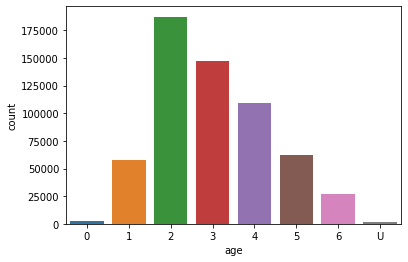

In [20]:
utils.plot_cat(raw_df, 'age', x_order=sorted(raw_df['age'].unique()))

- The value 'U' accounts for only 0.2% observations.
- The presence of this value indicates missing or fault in data collection.

---
Try to look into details of these '0' and 'U' values

In [94]:
_tmp = raw_df.query('age in ["U"]')
_tmp.pipe(choose_random_user)

,step,customer,age,gender,merchant,category,amount,fraud
467,0,C2075935351,U,E,M1823072687,es_transportation,21.25,0
4662,1,C2075935351,U,E,M1823072687,es_transportation,22.62,0
5621,2,C2075935351,U,E,M1823072687,es_transportation,27.78,0
10499,4,C2075935351,U,E,M85975013,es_food,67.45,0
13863,5,C2075935351,U,E,M1053599405,es_health,68.61,0
...,...,...,...,...,...,...,...,...
577285,175,C2075935351,U,E,M1823072687,es_transportation,26.88,0
583027,176,C2075935351,U,E,M1823072687,es_transportation,41.41,0
583481,177,C2075935351,U,E,M1823072687,es_transportation,46.10,0
587866,178,C2075935351,U,E,M1823072687,es_transportation,18.78,0


In [95]:
utils.describe_segments([raw_df, _tmp], ['raw_df', '_tmp'])

,cnt_row,cnt_cust,avg_amount,med_amount,perc_female,avg_steps,avg_txn
raw_df,"594,643","4,112",37.9,26.9,54.6%,139.1,144.6
_tmp,"1,178",9,36.6,27.2,0.0%,125.9,130.9


- There are only 9 customers with age = 'U'

Possible actions:
- Convert this segment to "U" which stands for "Unknown"
- Discard

#### Gender

,cnt,perc
F,"324,565",54.6%
M,"268,385",45.1%
E,"1,178",0.2%
U,515,0.1%


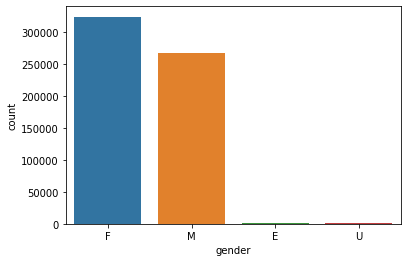

In [15]:
utils.plot_cat(raw_df, 'gender')

In [16]:
utils.describe_segment(raw_df.query("gender in ('E', 'U')"))

,cnt_row,cnt_cust,avg_amount,med_amount,perc_female,avg_steps,avg_txn
0,1693,12,35.070549,26.72,0.0,136.0,141.083333


As gender is the label -> discard 12 users with gender equal 'E' or 'U'

#### Merchant

,cnt,perc
M1823072687,"299,693",50.4%
M348934600,"205,426",34.5%
M85975013,"26,254",4.4%
M1053599405,"6,821",1.1%
M151143676,"6,373",1.1%
M855959430,"6,098",1.0%
M1946091778,"5,343",0.9%
M1913465890,"3,988",0.7%
M209847108,"3,814",0.6%
M480139044,"3,508",0.6%


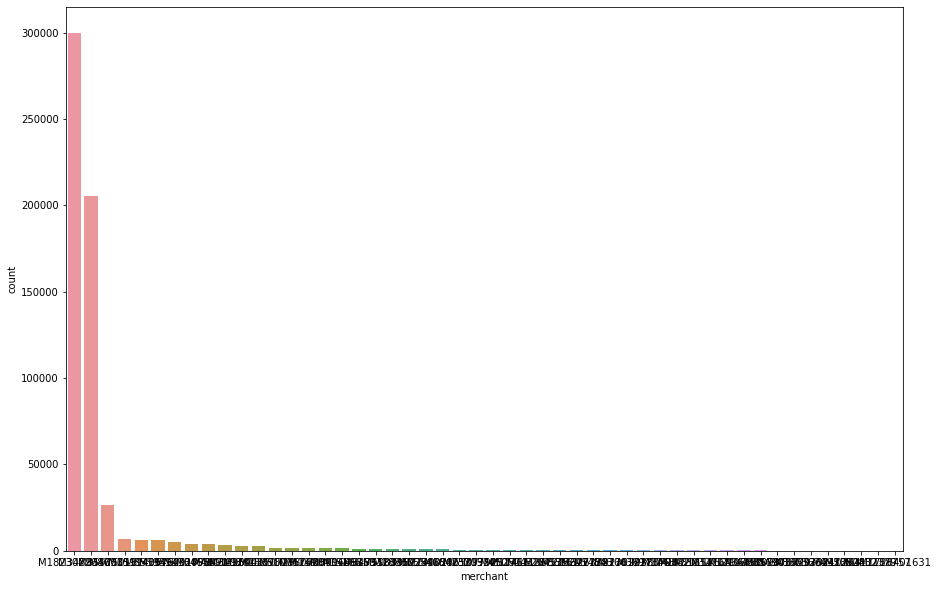

In [18]:
plt.figure(figsize=(15,10))
utils.plot_cat(raw_df, 'merchant')

There are two merchants that are extremely popular: M1823072687 and M348934600.

Below we are looking at those two segments:

In [38]:
utils.describe_segments([raw_df, raw_df.query('merchant == "M1823072687"'),
                         raw_df.query('merchant == "M348934600"')],
                        ['raw_df', 'M1823072687', 'M348934600'])

,cnt_row,cnt_cust,avg_amount,med_amount,perc_female,avg_steps,avg_txn
raw_df,"594,643","4,112",37.9,26.9,54.6%,139.1,144.6
M1823072687,"299,693","3,573",27.0,25.0,54.0%,83.9,83.9
M348934600,"205,426","3,929",27.0,25.0,54.8%,52.3,52.3


- These two segments are quite identical, with both having significantly less avg_steps compared to raw_df.
- Gender ratio shows no real difference.

#### Category

,cnt,perc
es_transportation,"505,119",84.9%
es_food,"26,254",4.4%
es_health,"16,133",2.7%
es_wellnessandbeauty,"15,086",2.5%
es_fashion,"6,454",1.1%
es_barsandrestaurants,"6,373",1.1%
es_hyper,"6,098",1.0%
es_sportsandtoys,"4,002",0.7%
es_tech,"2,370",0.4%
es_home,"1,986",0.3%


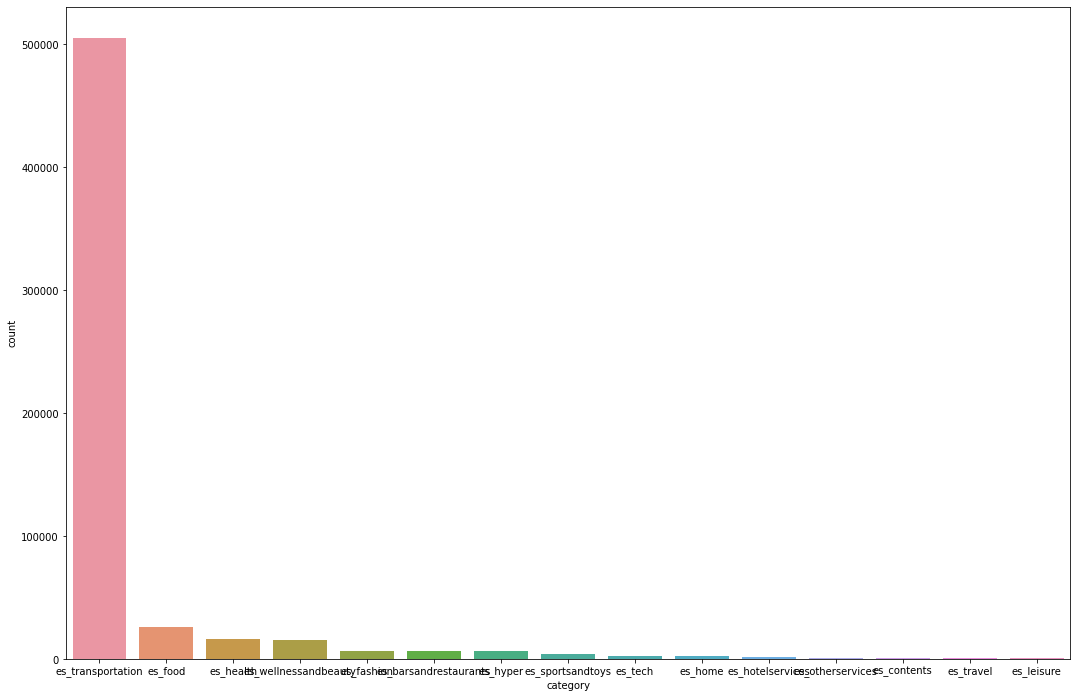

In [21]:
plt.figure(figsize=(18,12))
utils.plot_cat(raw_df, 'category')

- 85% of all transactions in this dataset relates to transportation.

Possible actions:
- Divide transportation into smaller sub-categories to maintain a more uniform distribution, which should be better for discrimination task. 

Check out some of the less popular categories:

In [25]:
utils.describe_segments([raw_df, raw_df.query('category == "es_food"'),
                         raw_df.query('category == "es_health"'),
                         raw_df.query('category == "es_wellnessandbeauty"')],
                        ['raw_df', 'food', 'health', 'wellnessandbeauty'])

,cnt_row,cnt_cust,avg_amount,med_amount,perc_female,avg_steps,avg_txn
raw_df,"594,643","4,112",37.9,26.9,54.6%,139.1,144.6
food,"26,254","3,442",37.1,33.5,54.5%,7.6,7.6
health,"16,133","3,541",135.6,97.9,57.6%,3.1,4.6
wellnessandbeauty,"15,086","3,851",65.5,51.9,55.8%,3.1,3.9


- There are more females in category `health` and `wellnessandbeauty`

#### Amount

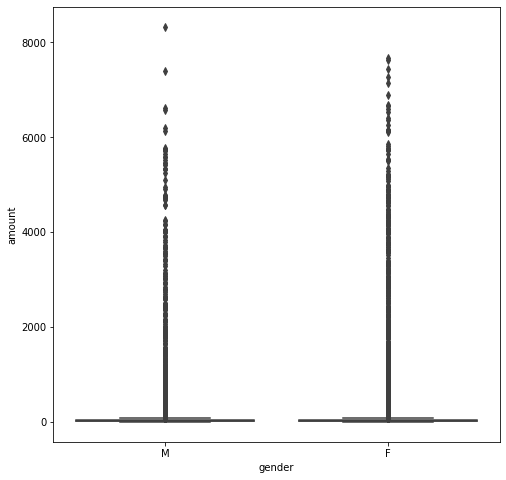

In [44]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(x="gender", y="amount", data=raw_df.query("gender in ('F', 'M')"))

The above boxplots show highly right-skewed data. To better observe the distribution, I apply a log-transform to the `amount` variable.

/home/quydv1/anaconda3/envs/banksim/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


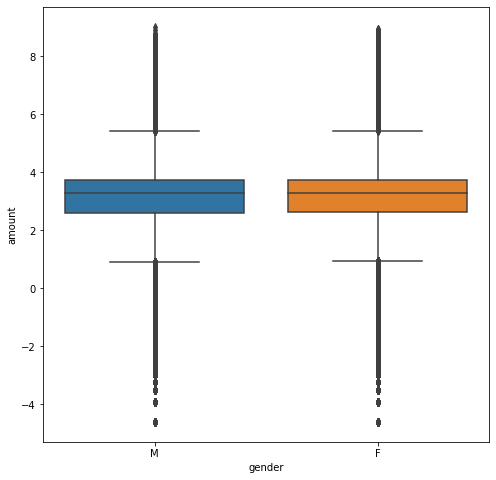

In [41]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(x="gender", y="amount",
                 data=(raw_df.query("gender in ('F', 'M')")
                             .assign(amount=lambda df: np.log(df['amount']))))

- The distribution of `amount` based on gender are identical.
- Double-check below:

In [42]:
utils.describe_segments([raw_df, raw_df.query('gender == "F"'),
                         raw_df.query('gender == "M"')],
                        ['raw_df', 'female', 'male'])

,cnt_row,cnt_cust,avg_amount,med_amount,perc_female,avg_steps,avg_txn
raw_df,"594,643","4,112",37.9,26.9,54.6%,139.1,144.6
female,"324,565","2,256",39.2,27.0,100.0%,138.2,143.9
male,"268,385","1,844",36.3,26.8,0.0%,140.3,145.5


#### Fraud

,cnt,perc
0,"587,443",98.8%
1,"7,200",1.2%


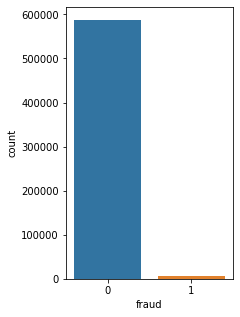

In [47]:
plt.figure(figsize=(3,5))
utils.plot_cat(raw_df, 'fraud')

In [55]:
pd.pivot_table(raw_df,
               index='fraud',
               columns=['gender'],
               values='customer',
               aggfunc='count',
               margins=True)

gender,E,F,M,U,All
fraud,,,,,
0,1171.0,319807.0,265950.0,515.0,587443
1,7.0,4758.0,2435.0,NaN,7200
All,1178.0,324565.0,268385.0,515.0,594643


In [73]:
utils.crosstab(raw_df, feature='fraud', label='gender')

gender,E,F,M,U
fraud,,,,
0,0.2%,54.9%,44.8%,0.1%
1,0.3%,56.2%,43.6%,0.0%


- Of all fraud transactions, 56.2% are from female users. Compared with 54.9% of male, this finding suggests that female accounts are more easily hacked than male's.

#### Step

In [103]:
_tmp = (raw_df.groupby(['gender', 'customer'])
              ['step'].nunique().to_frame('nunique_step')
              .reset_index())
_tmp

,gender,customer,nunique_step
0,E,C1152835627,145
1,E,C1208164294,9
2,E,C1215440829,115
3,E,C1374607221,162
4,E,C1871125244,94
...,...,...,...
4107,M,C998690782,168
4108,M,C999723254,119
4109,U,C824676284,162
4110,U,C885208928,172


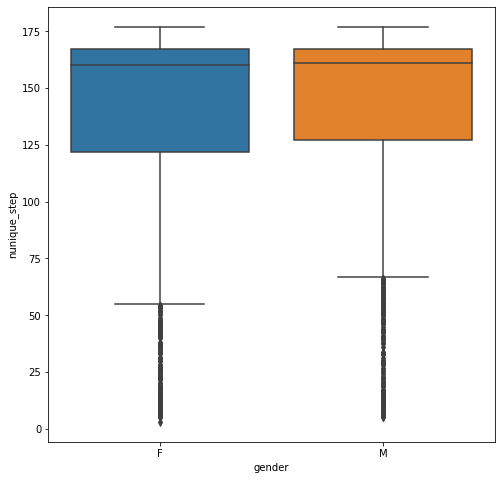

In [104]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(x="gender", y="nunique_step",
                 data=(_tmp.query("gender in ('F', 'M')")))

# Hypothesis

#### [I6: Disproportionate customers wrt some specific merchants](https://github.com/dvquy13/banksim/issues/3)

In [75]:
utils.crosstab(raw_df.query('gender in ("F", "M")'), feature='merchant', label='gender')

gender,F,M
merchant,,
M1053599405,55.7%,44.3%
M117188757,40.0%,60.0%
M1198415165,57.5%,42.5%
M1294758098,63.4%,36.6%
M1313686961,51.9%,48.1%
M1352454843,53.7%,46.3%
M1353266412,57.6%,42.4%
M1400236507,56.8%,43.2%
M1416436880,54.2%,45.8%


In [87]:
feature = 'merchant'
label = 'gender'
df = raw_df.query('gender in ("F", "M")')

ct_df_norm = pd.crosstab(index=df[feature], columns=df[label],
                         values=df['customer'],
                         aggfunc='nunique', normalize='index')

ct_df_abs = pd.crosstab(index=df[feature], columns=df[label],
                        values=df['customer'],
                        aggfunc='nunique')

In [84]:
ct_df_concat = pd.concat([ct_df_norm['F'].to_frame('perc_female'),
                          ct_df_abs['F'].to_frame('cnt_female')],
                         axis = 1)

In [93]:
ct_df_concat.sort_values(['perc_female'], ascending=False) \
            .style.bar(vmin=0, vmax=1, subset=['perc_female']) \
                  .bar(vmin=0, subset=['cnt_female'])

,perc_female,cnt_female
merchant,,
M1726401631,0.666667,2
M2080407379,0.659574,31
M1873032707,0.640000,128
M1294758098,0.634483,92
M17379832,0.632743,143
M933210764,0.629630,34
M1748431652,0.625000,130
M692898500,0.597806,327
M50039827,0.595318,356


- Given that proportion of female customers is approx. 54%, there are many merchants with more transactions from female than usual.

# Summary

This EDA process suggests:
1. Drop some noisy values because they take up only a tiny fraction of all observations
1. There are gender-dispropotional merchants
1. There is no easy rulebase other than the typical "predicting all customers being female then we have 55% accuracy"

# Archive
---

# EDA

#### Amount

In [39]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)

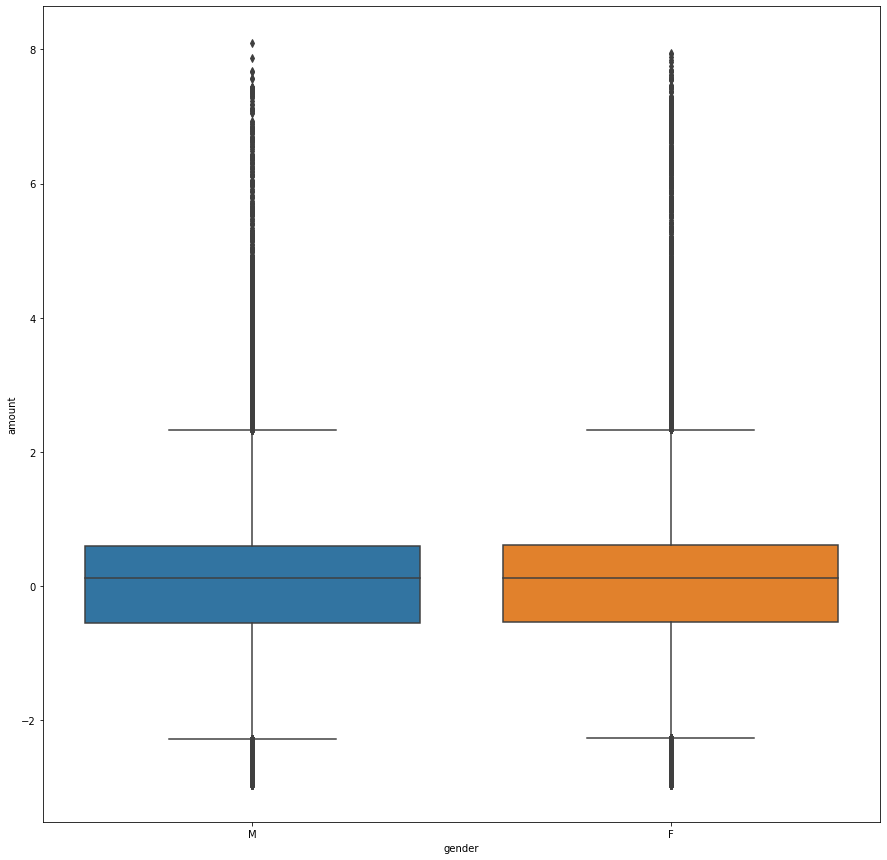

In [40]:
plt.figure(figsize=(15,15))
ax = sns.boxplot(x="gender", y="amount",
                 data=(raw_df.query("gender in ('F', 'M')")
                             .assign(amount=lambda df: pt.fit_transform(df[['amount']]))))